In [1]:
# import libriary
import pandas as pd
import os
import sys
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# encoder libirary
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

# modeling & evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA

# tensorflow
import tensorflow as tf
from tensorflow import feature_column as fc
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
df_new = pd.read_csv('C:\\Users\\chend\\Documents\\case\\df_new.csv')
df_new = df_new.drop(columns=['Unnamed: 0'])

In [10]:
df_new.shape

(265980, 31)

In [11]:
def DNN_model(X_train, y_train, X_test, y_test):
    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

    # Define the FNN architecture
    model = keras.models.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(X_train_smote.shape[1],)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    # Compile the model
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    # Define early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=3)

    # Train the model with early stopping
    history = model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=256, validation_data=(X_test_scaled, y_test),
                        callbacks=[early_stop])

    return model, scaler



In [12]:


def validate_model(model, scaler, X_test, y_test, threshold=0.5):
    # Normalize the features
    X_test_scaled = scaler.transform(X_test)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)

    # Get predicted probabilities from the model
    y_pred_prob = model.predict(X_test_scaled)

    # Apply threshold to convert probabilities to binary labels
    y_pred = np.where(y_pred_prob >= threshold, 1, 0)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Print the evaluation metrics
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC AUC score:", roc_auc)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


Epoch 1/20
1637/1637 [==============================] - 5s 2ms/step - loss: 0.0621 - accuracy: 0.9774 - val_loss: 0.0453 - val_accuracy: 0.9807
Epoch 2/20
1637/1637 [==============================] - 3s 2ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 0.0371 - val_accuracy: 0.9862
Epoch 3/20
1637/1637 [==============================] - 3s 2ms/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.0417 - val_accuracy: 0.9855
Epoch 4/20
1637/1637 [==============================] - 3s 2ms/step - loss: 0.0276 - accuracy: 0.9921 - val_loss: 0.0348 - val_accuracy: 0.9898
Epoch 5/20
1637/1637 [==============================] - 3s 2ms/step - loss: 0.0251 - accuracy: 0.9931 - val_loss: 0.0453 - val_accuracy: 0.9854
Epoch 6/20
1637/1637 [==============================] - 3s 2ms/step - loss: 0.0236 - accuracy: 0.9936 - val_loss: 0.0432 - val_accuracy: 0.9875
Epoch 7/20
1637/1637 [==============================] - 2s 1ms/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.0337 - val_accuracy:

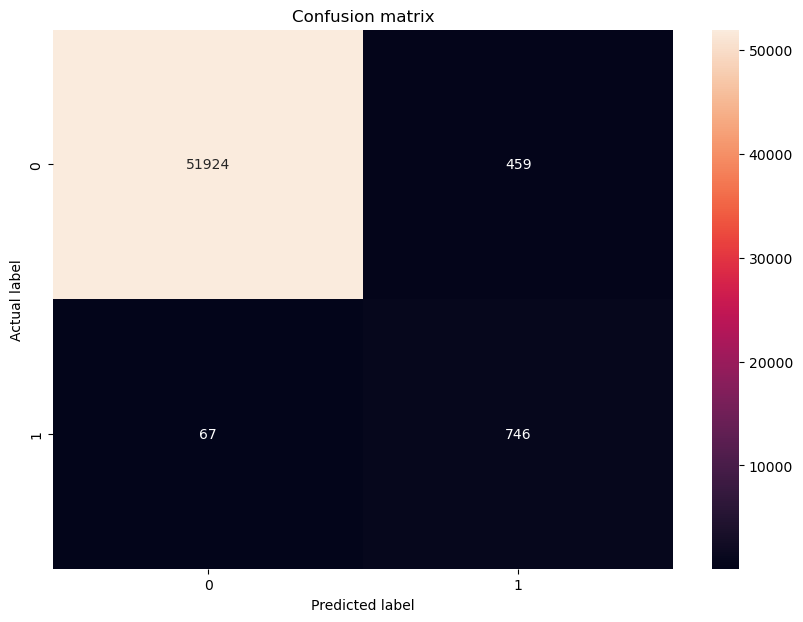

In [13]:
# Split the data into training and test sets
train, test = train_test_split(df_new, test_size=0.2, random_state=42)

# Define the features and target
X_train = train.drop("Returned_new", axis=1)
y_train = train["Returned_new"]
X_test = test.drop("Returned_new", axis=1)
y_test = test["Returned_new"]

# Train the model
model, scaler = DNN_model(X_train, y_train, X_test, y_test)

# Validate the model
validate_model(model, scaler, X_test, y_test)

In [14]:
X_train.head()

,PolicyPurchased,Arbitrated_UsagePerYear,Arbitrated_LogSalePrice,Arbitrated,PSI,Arbitrated_DSEligible,SaleMonth,Arbitrated_LogMileageCategory,LIGHTR,SellerID,Buyer_Average_Arbitrated,LogMileage,Buyer_Seller_Price,PriceDiffPercentage,LogSalePrice,Arbitrated_PSIEligible,LogMMR,Autocheck_score,UsagePerYear,Buyer_Autocheck_Price,PriceDiff,Buyer_Arbitrated_Transactions,SaleDay,ConditionReport,SaleWeekday,Buyer_Total_Arbitrated,Age,Buyer_Total_LogSalePrice,Buyer_Total_Autocheck_score,CarsBoughtBuyer
151455,0,0.0,0.000000,0,0,0,3,0.0,0,446761,0.004094,10.501664,9.514291,7.777778,9.717218,0,9.798183,-2.600000,9093.75,9.447898,-1400,3810268,19,24.0,1,8,4,18317.342095,287.776035,1958
116428,0,0.0,0.000000,0,0,0,4,0.0,0,439355,0.019765,9.660460,9.752706,1.764706,9.758520,0,9.741027,1.000000,7842.00,9.699213,300,4432624,18,42.0,3,42,2,20337.457762,3003.822545,2128
225632,0,11269.0,10.247113,1,1,1,5,1.0,0,334318,0.061912,11.275734,10.247113,4.059041,10.247113,1,10.207326,2.142857,11269.00,9.643555,1100,101910,9,36.0,3,79,7,12519.094479,1655.633938,1290
26145,0,0.0,0.000000,0,0,0,3,0.0,0,432754,0.020971,10.439396,9.565160,0.862069,9.367430,0,9.358847,0.600000,17089.50,9.679790,100,24554118,14,44.0,3,105,2,48213.506461,6617.312216,5009
180389,0,0.0,0.000000,0,1,0,3,0.0,0,29291,0.052269,11.359786,9.310046,15.245478,9.012011,0,9.177404,2.333333,14300.00,9.412999,-1475,28783664,28,41.0,3,288,6,53502.347774,10597.865886,5512
